In [12]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import tensorflow as tf


In [13]:
import numpy as np

# Increase the number of warehouses and delivery locations
num_warehouses = 10
num_deliveries = 50

# Warehouse locations (latitude, longitude)
np.random.seed(42)  # For reproducibility
warehouse_locations = np.random.uniform(low=[40.5, -74.3], high=[40.9, -73.7], size=(num_warehouses, 2))

# Delivery locations (latitude, longitude)
delivery_locations = np.random.uniform(low=[40.5, -74.3], high=[40.9, -73.7], size=(num_deliveries, 2))

# Distance matrix (distances between each warehouse and each delivery point)
distance_matrix = np.random.uniform(low=5, high=50, size=(num_warehouses, num_deliveries))

# Traffic data (factor to modify distances due to traffic conditions)
traffic_data = distance_matrix * np.random.uniform(low=1.0, high=2.0, size=(num_warehouses, num_deliveries))

# Vehicle capacities (random values between 500 and 2000 units)
vehicle_capacities = np.random.randint(low=500, high=2000, size=(num_warehouses, 5))  # 5 vehicles per warehouse

print(f"Generated {num_warehouses} warehouses, {num_deliveries} delivery points, and vehicle data for each warehouse.")


Generated 10 warehouses, 50 delivery points, and vehicle data for each warehouse.


In [14]:
import pandas as pd

# Save warehouse locations
warehouse_df = pd.DataFrame(warehouse_locations, columns=['Latitude', 'Longitude'])
warehouse_df.to_csv('warehouse_data.csv', index=False)

# Save delivery locations
delivery_df = pd.DataFrame(delivery_locations, columns=['Latitude', 'Longitude'])
delivery_df.to_csv('delivery_data.csv', index=False)

# Save distance matrix
distance_df = pd.DataFrame(distance_matrix)
distance_df.to_csv('distance_matrix.csv', index=False)

# Save traffic data
traffic_df = pd.DataFrame(traffic_data)
traffic_df.to_csv('traffic_data.csv', index=False)

# Save vehicle capacities
vehicle_df = pd.DataFrame(vehicle_capacities, columns=[f'Vehicle_{i+1}_Capacity' for i in range(5)])
vehicle_df.to_csv('vehicle_data.csv', index=False)

print("Extended data has been saved as CSV files.")


Extended data has been saved as CSV files.


In [15]:
from IPython.display import FileLink

# Create download links for the CSV files
download_links = [
    FileLink('warehouse_data.csv'),
    FileLink('delivery_data.csv'),
    FileLink('distance_matrix.csv'),
    FileLink('traffic_data.csv'),
    FileLink('vehicle_data.csv')
]

# Display download links
for link in download_links:
    display(link)


/home/jovyan/warehouse_data.csv

/home/jovyan/delivery_data.csv

/home/jovyan/distance_matrix.csv

/home/jovyan/traffic_data.csv

/home/jovyan/vehicle_data.csv

In [16]:
import pandas as pd

# Load each dataset
warehouse_data = pd.read_csv('warehouse_data.csv')
delivery_data = pd.read_csv('delivery_data.csv')
traffic_data = pd.read_csv('traffic_data.csv')
distance_matrix = pd.read_csv('distance_matrix.csv')
vehicle_data = pd.read_csv('vehicle_data.csv')

# Display the first few rows of each dataset to check the data
print("Warehouse Data")
print(warehouse_data.head())

print("\nDelivery Data")
print(delivery_data.head())

print("\nTraffic Data")
print(traffic_data.head())

print("\nDistance Matrix")
print(distance_matrix.head())

print("\nVehicle Data")
print(vehicle_data.head())


Warehouse Data
    Latitude  Longitude
0  40.649816 -73.729571
1  40.792798 -73.940805
2  40.562407 -74.206403
3  40.523233 -73.780294
4  40.740446 -73.875156

Delivery Data
    Latitude  Longitude
0  40.744741 -74.216304
1  40.616858 -74.080183
2  40.682428 -73.828894
3  40.579870 -73.991459
4  40.736966 -74.272130

Traffic Data
           0          1          2          3          4          5  \
0  48.961948  54.812680  26.464031  14.774472  24.689846  33.154884   
1  41.643494  10.899672  30.294278  23.160849  47.999719  25.466606   
2  67.052198  36.114886   9.828152  37.516294  26.662295  29.431565   
3  46.003757  76.544869  49.630083  64.409110  50.342976  31.701192   
4  53.572151  37.328928  46.284265  24.603610  73.747234  73.348777   

           6          7          8          9  ...         40         41  \
0  61.149548  76.421930   5.507738  35.047730  ...  29.224211  66.456409   
1  40.135928  31.316286  92.866143  20.872119  ...  52.266482  57.658859   
2  55.604337 

In [17]:
# Check for missing values in each dataset
print("Warehouse Data missing values:\n", warehouse_data.isnull().sum())
print("Delivery Data missing values:\n", delivery_data.isnull().sum())
print("Traffic Data missing values:\n", traffic_data.isnull().sum())
print("Distance Matrix missing values:\n", distance_matrix.isnull().sum())
print("Vehicle Data missing values:\n", vehicle_data.isnull().sum())

# Example: If missing values are found, fill them or drop the rows
# Fill missing values with an appropriate value (mean or median, for example)
warehouse_data.fillna(warehouse_data.mean(), inplace=True)
delivery_data.fillna(delivery_data.mean(), inplace=True)
traffic_data.fillna(traffic_data.mean(), inplace=True)
distance_matrix.fillna(distance_matrix.mean(), inplace=True)
vehicle_data.fillna(vehicle_data.mean(), inplace=True)

# Confirm that missing values are handled
print("\nAfter filling missing values:")
print("Warehouse Data missing values:\n", warehouse_data.isnull().sum())
print("Delivery Data missing values:\n", delivery_data.isnull().sum())
print("Traffic Data missing values:\n", traffic_data.isnull().sum())
print("Distance Matrix missing values:\n", distance_matrix.isnull().sum())
print("Vehicle Data missing values:\n", vehicle_data.isnull().sum())


Warehouse Data missing values:
 Latitude     0
Longitude    0
dtype: int64
Delivery Data missing values:
 Latitude     0
Longitude    0
dtype: int64
Traffic Data missing values:
 0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
dtype: int64
Distance Matrix missing values:
 0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0

In [18]:
# Add a Delivery_Location_ID column
delivery_data['Delivery_Location_ID'] = delivery_data.index

# Example: Adding dummy values for `Demand` and `Delivery_Time_Window`
import numpy as np

# Random demand between 100 and 500
delivery_data['Demand'] = np.random.randint(100, 500, size=len(delivery_data))  

# Randomly assigning time windows
delivery_data['Delivery_Time_Window'] = np.random.choice(['Morning', 'Afternoon', 'Evening'], size=len(delivery_data))  

# Display the updated delivery data
print(delivery_data.head())


    Latitude  Longitude  Delivery_Location_ID  Demand Delivery_Time_Window
0  40.744741 -74.216304                     0     144              Morning
1  40.616858 -74.080183                     1     444              Morning
2  40.682428 -73.828894                     2     280            Afternoon
3  40.579870 -73.991459                     3     269            Afternoon
4  40.736966 -74.272130                     4     455              Evening


In [19]:
# Convert Traffic Data from a matrix format to a pairwise format
traffic_data_melted = pd.DataFrame(traffic_data.stack()).reset_index()
traffic_data_melted.columns = ['Origin', 'Destination', 'Traffic_Delay']

# Similarly for Distance Matrix
distance_matrix_melted = pd.DataFrame(distance_matrix.stack()).reset_index()
distance_matrix_melted.columns = ['Origin', 'Destination', 'Distance']

# Display the first few rows of the melted data
print("Traffic Data Melted:")
print(traffic_data_melted.head())

print("\nDistance Matrix Melted:")
print(distance_matrix_melted.head())


Traffic Data Melted:
   Origin Destination  Traffic_Delay
0       0           0      48.961948
1       0           1      54.812680
2       0           2      26.464031
3       0           3      14.774472
4       0           4      24.689846

Distance Matrix Melted:
   Origin Destination   Distance
0       0           0  41.334807
1       0           1  45.324108
2       0           2  19.310156
3       0           3   9.952337
4       0           4  15.257082


In [20]:
# Example: Adding random vehicle load and fuel consumption values
vehicle_data['Load'] = np.random.randint(500, 2000, size=len(vehicle_data))  # Random load in kilograms
vehicle_data['Fuel_Consumption'] = np.random.uniform(5, 15, size=len(vehicle_data))  # Random fuel consumption in liters/km

# Display the first few rows of the updated vehicle data
print(vehicle_data.head())


   Vehicle_1_Capacity  Vehicle_2_Capacity  Vehicle_3_Capacity  \
0                1718                1420                1237   
1                1020                1986                 539   
2                1454                1749                1483   
3                 537                 827                1774   
4                 953                 536                1839   

   Vehicle_4_Capacity  Vehicle_5_Capacity  Load  Fuel_Consumption  
0                1855                 669  1473         14.095245  
1                1784                1918  1607         13.573601  
2                1647                1474  1545         14.645205  
3                1699                1413  1982         12.600941  
4                1472                1295  1348          9.422988  


In [23]:
# Convert both columns to string
complete_data['Destination'] = complete_data['Destination'].astype(str)
delivery_data['Delivery_Location_ID'] = delivery_data['Delivery_Location_ID'].astype(str)

# Now perform the merge
complete_data = pd.merge(complete_data, delivery_data, left_on='Destination', right_on='Delivery_Location_ID')

# Display the first few rows of the complete dataset
print(complete_data.head())


   Origin Destination  Traffic_Delay   Distance  Vehicle_ID  \
0       0           0      48.961948  41.334807           0   
1       1           0      41.643494  35.490396           0   
2       2           0      67.052198  34.592580           0   
3       3           0      46.003757  41.421252           0   
4       4           0      53.572151  29.715200           0   

   Vehicle_1_Capacity  Vehicle_2_Capacity  Vehicle_3_Capacity  \
0                1718                1420                1237   
1                1718                1420                1237   
2                1718                1420                1237   
3                1718                1420                1237   
4                1718                1420                1237   

   Vehicle_4_Capacity  Vehicle_5_Capacity  ...  Latitude_x  Longitude_x  \
0                1855                 669  ...   40.744741   -74.216304   
1                1855                 669  ...   40.744741   -74.216304   
2    

In [24]:
# Save the merged dataset to a CSV file
complete_data.to_csv('merged_delivery_data.csv', index=False)


In [25]:
from IPython.display import FileLink

# Create a download link for the CSV file
FileLink('merged_delivery_data.csv')


/home/jovyan/merged_delivery_data.csv

In [29]:
# Import necessary libraries
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Load your merged dataset
complete_data = pd.read_csv('merged_delivery_data.csv')

# Check columns in complete_data
print("Columns in complete_data:", complete_data.columns)

# Check the first few rows of the dataset
print(complete_data.head())

# Ensure 'Delivery_Time_Window' is in the columns
if 'Delivery_Time_Window' in complete_data.columns:
    # Encoding categorical feature 'Delivery_Time_Window' using OneHotEncoder
    encoder = OneHotEncoder(drop='first', sparse_output=False)
    encoded_time_window = encoder.fit_transform(complete_data[['Delivery_Time_Window']])

    # Convert encoded features to DataFrame
    encoded_time_window_df = pd.DataFrame(encoded_time_window, columns=encoder.get_feature_names_out(['Delivery_Time_Window']))

    # Drop original categorical column and add the encoded columns
    complete_data = pd.concat([complete_data.drop(columns=['Delivery_Time_Window']), encoded_time_window_df], axis=1)

    # Display the data to check encoding
    print(complete_data.head())
else:
    print("'Delivery_Time_Window' not found in complete_data.")


Columns in complete_data: Index(['Origin', 'Destination', 'Traffic_Delay', 'Distance', 'Vehicle_ID',
       'Vehicle_1_Capacity', 'Vehicle_2_Capacity', 'Vehicle_3_Capacity',
       'Vehicle_4_Capacity', 'Vehicle_5_Capacity', 'Load', 'Fuel_Consumption',
       'Latitude_x', 'Longitude_x', 'Delivery_Location_ID_x', 'Demand_x',
       'Delivery_Time_Window_x', 'Latitude_y', 'Longitude_y',
       'Delivery_Location_ID_y', 'Demand_y', 'Delivery_Time_Window_y'],
      dtype='object')
   Origin  Destination  Traffic_Delay   Distance  Vehicle_ID  \
0       0            0      48.961948  41.334807           0   
1       1            0      41.643494  35.490396           0   
2       2            0      67.052198  34.592580           0   
3       3            0      46.003757  41.421252           0   
4       4            0      53.572151  29.715200           0   

   Vehicle_1_Capacity  Vehicle_2_Capacity  Vehicle_3_Capacity  \
0                1718                1420                1237   
1 

In [30]:
# Import necessary libraries
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Load your merged dataset
complete_data = pd.read_csv('merged_delivery_data.csv')

# Check columns in complete_data
print("Columns in complete_data:", complete_data.columns)

# Check the first few rows of the dataset
print(complete_data.head())

# Ensure 'Delivery_Time_Window_x' is in the columns
if 'Delivery_Time_Window_x' in complete_data.columns:
    # Encoding categorical feature 'Delivery_Time_Window_x' using OneHotEncoder
    encoder = OneHotEncoder(drop='first', sparse_output=False)
    encoded_time_window = encoder.fit_transform(complete_data[['Delivery_Time_Window_x']])

    # Convert encoded features to DataFrame
    encoded_time_window_df = pd.DataFrame(encoded_time_window, columns=encoder.get_feature_names_out(['Delivery_Time_Window_x']))

    # Drop original categorical column and add the encoded columns
    complete_data = pd.concat([complete_data.drop(columns=['Delivery_Time_Window_x']), encoded_time_window_df], axis=1)

    # Display the data to check encoding
    print(complete_data.head())
else:
    print("'Delivery_Time_Window_x' not found in complete_data.")


Columns in complete_data: Index(['Origin', 'Destination', 'Traffic_Delay', 'Distance', 'Vehicle_ID',
       'Vehicle_1_Capacity', 'Vehicle_2_Capacity', 'Vehicle_3_Capacity',
       'Vehicle_4_Capacity', 'Vehicle_5_Capacity', 'Load', 'Fuel_Consumption',
       'Latitude_x', 'Longitude_x', 'Delivery_Location_ID_x', 'Demand_x',
       'Delivery_Time_Window_x', 'Latitude_y', 'Longitude_y',
       'Delivery_Location_ID_y', 'Demand_y', 'Delivery_Time_Window_y'],
      dtype='object')
   Origin  Destination  Traffic_Delay   Distance  Vehicle_ID  \
0       0            0      48.961948  41.334807           0   
1       1            0      41.643494  35.490396           0   
2       2            0      67.052198  34.592580           0   
3       3            0      46.003757  41.421252           0   
4       4            0      53.572151  29.715200           0   

   Vehicle_1_Capacity  Vehicle_2_Capacity  Vehicle_3_Capacity  \
0                1718                1420                1237   
1 

In [33]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming complete_data is already defined and contains the necessary data
# Check the columns in complete_data
print("Columns in complete_data:")
print(complete_data.columns)

# List of numerical features to scale
numerical_features = ['Traffic_Delay', 'Distance', 'Load', 'Fuel_Consumption',
                      'Vehicle_1_Capacity', 'Vehicle_2_Capacity',
                      'Vehicle_3_Capacity', 'Vehicle_4_Capacity',
                      'Vehicle_5_Capacity', 'Demand']  # Ensure 'Demand' exists

# Check if all numerical features are present in complete_data
missing_features = [feature for feature in numerical_features if feature not in complete_data.columns]
if missing_features:
    print("Missing features:", missing_features)
else:
    # Initialize the StandardScaler
    scaler = StandardScaler()

    # Scale the numerical features
    complete_data[numerical_features] = scaler.fit_transform(complete_data[numerical_features])

    # Display the first few rows to check scaling
    print("Scaled Complete Data:")
    display(complete_data.head())  # This will show the first five rows


Columns in complete_data:
Index(['Origin', 'Destination', 'Traffic_Delay', 'Distance', 'Vehicle_ID',
       'Vehicle_1_Capacity', 'Vehicle_2_Capacity', 'Vehicle_3_Capacity',
       'Vehicle_4_Capacity', 'Vehicle_5_Capacity', 'Load', 'Fuel_Consumption',
       'Latitude_x', 'Longitude_x', 'Delivery_Location_ID_x', 'Demand_x',
       'Latitude_y', 'Longitude_y', 'Delivery_Location_ID_y', 'Demand_y',
       'Delivery_Time_Window_y', 'Delivery_Time_Window_x_Evening',
       'Delivery_Time_Window_x_Morning'],
      dtype='object')
Missing features: ['Demand']


In [34]:
# Splitting the dataset into features (X) and target variable (y)
# Assuming 'Distance' is your target variable; you can change it as needed
X = complete_data.drop(columns=['Distance'])  # Features
y = complete_data['Distance']  # Target variable

# Importing train_test_split
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
print(f"Training data shape: {X_train.shape}, Testing data shape: {X_test.shape}")


Training data shape: (400, 22), Testing data shape: (100, 22)


In [35]:
# Importing the Linear Regression model
from sklearn.linear_model import LinearRegression

# Creating an instance of the model
model = LinearRegression()

# Training the model with the training data
model.fit(X_train, y_train)

# Displaying the model coefficients
print("Model coefficients:", model.coef_)


ValueError: could not convert string to float: 'Evening'

In [36]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Assume complete_data is already defined and cleaned

# Splitting the dataset into features (X) and target variable (y)
X = complete_data.drop(columns=['Distance'])  # Features
y = complete_data['Distance']  # Target variable

# One-hot encoding for categorical variables
X = pd.get_dummies(X, drop_first=True)

# Splitting the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Importing the Linear Regression model
model = LinearRegression()

# Training the model with the training data
model.fit(X_train, y_train)

# Displaying the model coefficients
print("Model coefficients:", model.coef_)


Model coefficients: [-1.13493183e-01 -8.51659501e-04  5.66314370e-01 -5.56020198e-02
 -4.73733349e-04  2.82572948e-04  1.46822170e-04 -1.35697923e-03
  5.00760991e-05  4.17705744e-04  2.76191552e-02 -8.67681457e-01
 -4.49986310e-01 -8.51659501e-04 -1.36928279e-03 -8.67681457e-01
 -4.49986310e-01 -8.51659501e-04 -1.36928279e-03  1.63852759e-01
  3.02677279e-01  1.63852759e-01  3.02677279e-01]


In [37]:
# Importing necessary metrics
from sklearn.metrics import mean_squared_error, r2_score

# Making predictions on the test set
y_pred = model.predict(X_test)

# Calculating Mean Squared Error and R² Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Displaying the evaluation metrics
print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 28.855220692697163
R² Score: 0.8532120623847328


In [38]:
# Creating interaction features
complete_data['Traffic_Distance'] = complete_data['Traffic_Delay'] * complete_data['Distance']
complete_data['Load_Fuel_Ratio'] = complete_data['Load'] / complete_data['Fuel_Consumption']
complete_data['Demand_Capacity_Ratio'] = complete_data['Demand'] / complete_data['Vehicle_1_Capacity']  # Example for one vehicle

# Display the data with new features
complete_data.head()


KeyError: 'Demand'

In [39]:
print(complete_data.columns)


Index(['Origin', 'Destination', 'Traffic_Delay', 'Distance', 'Vehicle_ID',
       'Vehicle_1_Capacity', 'Vehicle_2_Capacity', 'Vehicle_3_Capacity',
       'Vehicle_4_Capacity', 'Vehicle_5_Capacity', 'Load', 'Fuel_Consumption',
       'Latitude_x', 'Longitude_x', 'Delivery_Location_ID_x', 'Demand_x',
       'Latitude_y', 'Longitude_y', 'Delivery_Location_ID_y', 'Demand_y',
       'Delivery_Time_Window_y', 'Delivery_Time_Window_x_Evening',
       'Delivery_Time_Window_x_Morning', 'Traffic_Distance',
       'Load_Fuel_Ratio'],
      dtype='object')


In [40]:
complete_data['Demand_Capacity_Ratio'] = complete_data['Demand_x'] / complete_data['Vehicle_1_Capacity']


In [41]:
# Creating interaction features
complete_data['Traffic_Distance'] = complete_data['Traffic_Delay'] * complete_data['Distance']
complete_data['Load_Fuel_Ratio'] = complete_data['Load'] / complete_data['Fuel_Consumption']
complete_data['Demand_Capacity_Ratio'] = complete_data['Demand_x'] / complete_data['Vehicle_1_Capacity']  # Using Demand_x

# Display the data with new features
complete_data.head()


,Origin,Destination,Traffic_Delay,Distance,Vehicle_ID,Vehicle_1_Capacity,Vehicle_2_Capacity,Vehicle_3_Capacity,Vehicle_4_Capacity,Vehicle_5_Capacity,...,Latitude_y,Longitude_y,Delivery_Location_ID_y,Demand_y,Delivery_Time_Window_y,Delivery_Time_Window_x_Evening,Delivery_Time_Window_x_Morning,Traffic_Distance,Load_Fuel_Ratio,Demand_Capacity_Ratio
0,0,0,48.961948,41.334807,0,1718,1420,1237,1855,669,...,40.744741,-74.216304,0,144,Morning,0.0,1.0,2023.832658,104.503326,0.083818
1,1,0,41.643494,35.490396,0,1718,1420,1237,1855,669,...,40.744741,-74.216304,0,144,Morning,0.0,1.0,1477.944101,104.503326,0.083818
2,2,0,67.052198,34.592580,0,1718,1420,1237,1855,669,...,40.744741,-74.216304,0,144,Morning,0.0,1.0,2319.508521,104.503326,0.083818
3,3,0,46.003757,41.421252,0,1718,1420,1237,1855,669,...,40.744741,-74.216304,0,144,Morning,0.0,1.0,1905.533214,104.503326,0.083818
4,4,0,53.572151,29.715200,0,1718,1420,1237,1855,669,...,40.744741,-74.216304,0,144,Morning,0.0,1.0,1591.907166,104.503326,0.083818


In [42]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Setting up the model and parameters for Grid Search
ridge = Ridge()

# Define the parameters to search
param_grid = {
    'alpha': [0.1, 1.0, 10.0, 100.0],  # Regularization strength
}

# Setting up Grid Search with 5-fold cross-validation and MSE scoring
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fitting Grid Search to the training data
grid_search.fit(X_train, y_train)

# Displaying the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best score (MSE): ", -grid_search.best_score_)


Best parameters found:  {'alpha': 100.0}
Best score (MSE):  32.965619437350725


In [43]:
# Import necessary libraries
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Retraining the Ridge regression model with the best alpha
best_ridge = Ridge(alpha=100.0)
best_ridge.fit(X_train, y_train)

# Making predictions on the test set
y_pred_test = best_ridge.predict(X_test)

# Evaluating the model
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Test Mean Squared Error: ", mse_test)
print("Test R² Score: ", r2_test)


Test Mean Squared Error:  29.160878110984704
Test R² Score:  0.8516571679507218


In [44]:
# Assuming you have a GridSearchCV object named 'grid_search'
best_model = grid_search.best_estimator_

# Save the model to a file
import joblib

model_filename = 'route_optimization_model.pkl'
joblib.dump(best_model, model_filename)

print(f'Model saved as {model_filename}')


Model saved as route_optimization_model.pkl


In [46]:
import shutil

# Move the model file to a downloadable location
shutil.copy('route_optimization_model.pkl', '/mnt/data/route_optimization_model.pkl')

# Provide a link to download the file
from IPython.display import FileLink
FileLink('/mnt/data/route_optimization_model.pkl')


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/route_optimization_model.pkl'

In [47]:
import joblib

# Save the model to a file
model_filename = 'route_optimization_model.pkl'
joblib.dump(best_model, model_filename)

print(f'Model saved as {model_filename}')


Model saved as route_optimization_model.pkl


In [48]:
from IPython.display import FileLink

# Create a download link
FileLink(model_filename)


/home/jovyan/route_optimization_model.pkl

In [49]:
import joblib

# Load the trained model
model_filename = 'route_optimization_model.pkl'
best_model = joblib.load(model_filename)


In [50]:
import numpy as np
import pandas as pd

# Example input features (adjust values as needed for a realistic scenario)
sample_input = {
    'Origin': [0],
    'Destination': [1],
    'Traffic_Delay': [0.5],  # example traffic delay
    'Distance': [1.2],  # example distance
    'Vehicle_ID': [0],  # example vehicle ID
    'Vehicle_1_Capacity': [1500],  # capacity of vehicle 1
    'Vehicle_2_Capacity': [1400],
    'Vehicle_3_Capacity': [1300],
    'Vehicle_4_Capacity': [1600],
    'Vehicle_5_Capacity': [1500],
    'Load': [1000],  # example load
    'Fuel_Consumption': [0.5],  # example fuel consumption
    'Latitude': [40.712776],  # example latitude
    'Longitude': [-74.005974],  # example longitude
    'Delivery_Location_ID': [0],
    'Demand': [500],  # example demand
    'Delivery_Time_Window_Evening': [1],  # evening time window
    'Delivery_Time_Window_Morning': [0],  # morning time window
    'Traffic_Distance': [0.8],  # example traffic distance
    'Load_Fuel_Ratio': [0.1],  # load to fuel ratio
    'Demand_Capacity_Ratio': [0.5]  # demand to capacity ratio
}

# Convert to DataFrame
input_df = pd.DataFrame(sample_input)

# Display the input DataFrame
print(input_df)


   Origin  Destination  Traffic_Delay  Distance  Vehicle_ID  \
0       0            1            0.5       1.2           0   

   Vehicle_1_Capacity  Vehicle_2_Capacity  Vehicle_3_Capacity  \
0                1500                1400                1300   

   Vehicle_4_Capacity  Vehicle_5_Capacity  ...  Fuel_Consumption   Latitude  \
0                1600                1500  ...               0.5  40.712776   

   Longitude  Delivery_Location_ID  Demand  Delivery_Time_Window_Evening  \
0 -74.005974                     0     500                             1   

   Delivery_Time_Window_Morning  Traffic_Distance  Load_Fuel_Ratio  \
0                             0               0.8              0.1   

   Demand_Capacity_Ratio  
0                    0.5  

[1 rows x 21 columns]


In [57]:
# If you have access to the original training data or model pipeline
print("Model Coefficients:", loaded_model.coef_)
print("Model Intercept:", loaded_model.intercept_)

# Check the feature names in the input DataFrame
print("Feature Names in Input DataFrame:", input_df.columns.tolist())


Model Coefficients: [-1.10609379e-01 -9.54727783e-04  5.66043501e-01 -8.99506735e-02
 -6.07021537e-04  4.45849345e-04  1.77053567e-04 -8.53872456e-04
 -7.45070705e-05  2.74228615e-04 -3.34275514e-02 -7.17227282e-02
 -5.25678484e-02 -9.54727783e-04 -1.09924268e-03 -7.17227282e-02
 -5.25678484e-02 -9.54727783e-04 -1.09924268e-03  6.39944684e-02
  1.47649316e-01  6.39944684e-02  1.47649316e-01]
Model Intercept: 5.328061023018499
Feature Names in Input DataFrame: ['Origin', 'Destination', 'Traffic_Delay', 'Vehicle_ID', 'Vehicle_1_Capacity', 'Vehicle_2_Capacity', 'Vehicle_3_Capacity', 'Vehicle_4_Capacity', 'Vehicle_5_Capacity', 'Load', 'Fuel_Consumption', 'Demand_x', 'Demand_y', 'Latitude_x', 'Latitude_y', 'Longitude_x', 'Longitude_y', 'Delivery_Location_ID_x', 'Delivery_Location_ID_y', 'Delivery_Time_Window_x_Evening', 'Delivery_Time_Window_x_Morning', 'Delivery_Time_Window_y_Evening', 'Delivery_Time_Window_y_Morning']


In [58]:
import joblib
import pandas as pd

# Load the trained model
model_filename = 'route_optimization_model.pkl'
loaded_model = joblib.load(model_filename)

# Example input data for prediction, adjust according to your training features
data = {
    'Origin': [0],
    'Destination': [1],
    'Traffic_Delay': [0.5],
    'Vehicle_ID': [0],
    'Vehicle_1_Capacity': [1000],
    'Vehicle_2_Capacity': [800],
    'Vehicle_3_Capacity': [600],
    'Vehicle_4_Capacity': [400],
    'Vehicle_5_Capacity': [200],
    'Load': [300],
    'Fuel_Consumption': [0.2],
    'Latitude': [40.74],
    'Longitude': [-74.01],
    'Delivery_Location_ID': [0],
    'Demand': [150],
    # Include missing features as necessary
    'Delivery_Time_Window_Evening': [0],
    'Delivery_Time_Window_Morning': [1],
    # Add other features that might be missing from training
    'Demand_x': [150],  # Example value, replace with correct value from training
    'Demand_y': [200],  # Example value, replace with correct value from training
    'Latitude_x': [40.74],  # Example coordinates, replace as needed
    'Latitude_y': [40.74],  # Example coordinates, replace as needed
    'Longitude_x': [-74.01],  # Example coordinates, replace as needed
    'Longitude_y': [-74.01]   # Example coordinates, replace as needed
}

# Create the DataFrame
input_df = pd.DataFrame(data)

# Display the input DataFrame to confirm structure
print("Input DataFrame:")
print(input_df)

# Make predictions
try:
    predictions = loaded_model.predict(input_df)
    print("Predictions:", predictions)
except ValueError as e:
    print("Error during prediction:", e)


Input DataFrame:
   Origin  Destination  Traffic_Delay  Vehicle_ID  Vehicle_1_Capacity  \
0       0            1            0.5           0                1000   

   Vehicle_2_Capacity  Vehicle_3_Capacity  Vehicle_4_Capacity  \
0                 800                 600                 400   

   Vehicle_5_Capacity  Load  ...  Delivery_Location_ID  Demand  \
0                 200   300  ...                     0     150   

   Delivery_Time_Window_Evening  Delivery_Time_Window_Morning  Demand_x  \
0                             0                             1       150   

   Demand_y  Latitude_x  Latitude_y  Longitude_x  Longitude_y  
0       200       40.74       40.74       -74.01       -74.01  

[1 rows x 23 columns]
Error during prediction: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Delivery_Location_ID
- Delivery_Time_Window_Evening
- Delivery_Time_Window_Morning
- Demand
- Latitude
- ...
Feature names seen at fit time, ye

In [63]:
import pandas as pd
import joblib

# Load the trained model
model_filename = 'route_optimization_model.pkl'
loaded_model = joblib.load(model_filename)

# Manually define the model feature names in the correct order
model_features = [
    'Origin', 'Destination', 'Traffic_Delay', 'Vehicle_ID', 
    'Vehicle_1_Capacity', 'Vehicle_2_Capacity', 'Vehicle_3_Capacity', 
    'Vehicle_4_Capacity', 'Vehicle_5_Capacity', 'Load', 
    'Fuel_Consumption', 'Demand_x', 'Demand_y', 
    'Latitude_x', 'Longitude_x', 
    'Delivery_Location_ID_x', 'Delivery_Location_ID_y', 
    'Latitude_y', 'Longitude_y', 
    'Delivery_Time_Window_x_Evening', 
    'Delivery_Time_Window_x_Morning', 
    'Delivery_Time_Window_y_Evening', 
    'Delivery_Time_Window_y_Morning'
]

# Manually define input data ensuring all required features are present and in the correct order
input_data_values = [
    0,    # Origin
    1,    # Destination
    0.5,  # Traffic_Delay
    0,    # Vehicle_ID
    1000, # Vehicle_1_Capacity
    800,  # Vehicle_2_Capacity
    600,  # Vehicle_3_Capacity
    400,  # Vehicle_4_Capacity
    200,  # Vehicle_5_Capacity
    300,  # Load
    0.2,  # Fuel_Consumption
    150,  # Demand_x
    200,  # Demand_y
    40.74,# Latitude_x
    -74.01,# Longitude_x
    0,    # Delivery_Location_ID_x
    1,    # Delivery_Location_ID_y
    40.74,# Latitude_y
    -74.01,# Longitude_y
    0,    # Delivery_Time_Window_x_Evening
    1,    # Delivery_Time_Window_x_Morning
    0,    # Delivery_Time_Window_y_Evening
    1     # Delivery_Time_Window_y_Morning
]

# Create the DataFrame
input_df = pd.DataFrame([input_data_values], columns=model_features)

# Display the constructed input DataFrame
print("Constructed Input DataFrame:")
print(input_df)

# Make predictions
try:
    predictions = loaded_model.predict(input_df)
    print("Predictions:", predictions)
except ValueError as e:
    print("Error during prediction:", e)


Constructed Input DataFrame:
   Origin  Destination  Traffic_Delay  Vehicle_ID  Vehicle_1_Capacity  \
0       0            1            0.5           0                1000   

   Vehicle_2_Capacity  Vehicle_3_Capacity  Vehicle_4_Capacity  \
0                 800                 600                 400   

   Vehicle_5_Capacity  Load  ...  Latitude_x  Longitude_x  \
0                 200   300  ...       40.74       -74.01   

   Delivery_Location_ID_x  Delivery_Location_ID_y  Latitude_y  Longitude_y  \
0                       0                       1       40.74       -74.01   

   Delivery_Time_Window_x_Evening  Delivery_Time_Window_x_Morning  \
0                               0                               1   

   Delivery_Time_Window_y_Evening  Delivery_Time_Window_y_Morning  
0                               0                               1  

[1 rows x 23 columns]
Error during prediction: The feature names should match those that were passed during fit.
Feature names must be in

In [66]:
import pandas as pd

# Example data for prediction with the correct features
data = {
    'Origin': [0],  # Example origin index
    'Destination': [1],  # Example destination index
    'Traffic_Delay': [0.5],  # Example traffic delay
    'Vehicle_ID': [0],  # Example vehicle index
    'Vehicle_1_Capacity': [1000],  # Example capacity for vehicle 1
    'Vehicle_2_Capacity': [800],  # Example capacity for vehicle 2
    'Vehicle_3_Capacity': [600],  # Example capacity for vehicle 3
    'Vehicle_4_Capacity': [400],  # Example capacity for vehicle 4
    'Vehicle_5_Capacity': [200],  # Example capacity for vehicle 5
    'Load': [300],  # Example load
    'Fuel_Consumption': [0.2],  # Example fuel consumption
    'Demand_x': [150],  # Example demand for x
    'Demand_y': [200],  # Example demand for y
    'Latitude_x': [40.74],  # Example latitude for x
    'Longitude_x': [-74.01],  # Example longitude for x
    'Delivery_Location_ID_x': [0],  # Example delivery location ID for x
    'Delivery_Location_ID_y': [1],  # Example delivery location ID for y
    'Latitude_y': [40.74],  # Example latitude for y
    'Longitude_y': [-74.01],  # Example longitude for y
    'Delivery_Time_Window_x_Evening': [0],  # Binary for evening window
    'Delivery_Time_Window_x_Morning': [1],  # Binary for morning window
    'Delivery_Time_Window_y_Evening': [0],  # Binary for evening window
    'Delivery_Time_Window_y_Morning': [1]   # Binary for morning window
}

# Create the DataFrame
input_df = pd.DataFrame(data)

# Ensure the columns are in the correct order as per the model training
model_features = [
    'Origin', 'Destination', 'Traffic_Delay', 'Vehicle_ID', 
    'Vehicle_1_Capacity', 'Vehicle_2_Capacity', 'Vehicle_3_Capacity', 
    'Vehicle_4_Capacity', 'Vehicle_5_Capacity', 'Load', 
    'Fuel_Consumption', 'Demand_x', 'Demand_y', 
    'Latitude_x', 'Longitude_x', 
    'Delivery_Location_ID_x', 'Delivery_Location_ID_y', 
    'Latitude_y', 'Longitude_y', 
    'Delivery_Time_Window_x_Evening', 
    'Delivery_Time_Window_x_Morning', 
    'Delivery_Time_Window_y_Evening', 
    'Delivery_Time_Window_y_Morning'
]

# Reorder the input DataFrame columns to match the model's expected input
input_df = input_df[model_features]

# Display the input DataFrame
print("Constructed Input DataFrame:")
print(input_df)

# Make predictions
try:
    predictions = loaded_model.predict(input_df)
    print("Predictions:", predictions)
except ValueError as e:
    print("Error during prediction:", e)


Constructed Input DataFrame:
   Origin  Destination  Traffic_Delay  Vehicle_ID  Vehicle_1_Capacity  \
0       0            1            0.5           0                1000   

   Vehicle_2_Capacity  Vehicle_3_Capacity  Vehicle_4_Capacity  \
0                 800                 600                 400   

   Vehicle_5_Capacity  Load  ...  Latitude_x  Longitude_x  \
0                 200   300  ...       40.74       -74.01   

   Delivery_Location_ID_x  Delivery_Location_ID_y  Latitude_y  Longitude_y  \
0                       0                       1       40.74       -74.01   

   Delivery_Time_Window_x_Evening  Delivery_Time_Window_x_Morning  \
0                               0                               1   

   Delivery_Time_Window_y_Evening  Delivery_Time_Window_y_Morning  
0                               0                               1  

[1 rows x 23 columns]
Error during prediction: The feature names should match those that were passed during fit.
Feature names must be in

In [67]:
import pandas as pd

# Example data for prediction with the correct features
data = {
    'Origin': [0],  # Example origin index
    'Destination': [1],  # Example destination index
    'Traffic_Delay': [0.5],  # Example traffic delay
    'Vehicle_ID': [0],  # Example vehicle index
    'Vehicle_1_Capacity': [1000],  # Example capacity for vehicle 1
    'Vehicle_2_Capacity': [800],  # Example capacity for vehicle 2
    'Vehicle_3_Capacity': [600],  # Example capacity for vehicle 3
    'Vehicle_4_Capacity': [400],  # Example capacity for vehicle 4
    'Vehicle_5_Capacity': [200],  # Example capacity for vehicle 5
    'Load': [300],  # Example load
    'Fuel_Consumption': [0.2],  # Example fuel consumption
    'Demand_x': [150],  # Example demand for x
    'Demand_y': [100],  # Example demand for y
    'Latitude_x': [40.74],  # Example latitude for x
    'Longitude_x': [-74.01],  # Example longitude for x
    'Delivery_Location_ID_x': [0],  # Example delivery location ID for x
    'Delivery_Location_ID_y': [1],  # Example delivery location ID for y
    'Latitude_y': [40.75],  # Example latitude for y
    'Longitude_y': [-74.00],  # Example longitude for y
    'Delivery_Time_Window_x_Evening': [0],  # Binary for evening window
    'Delivery_Time_Window_x_Morning': [1],  # Binary for morning window
    'Delivery_Time_Window_y_Evening': [0],  # Binary for evening window
    'Delivery_Time_Window_y_Morning': [1]   # Binary for morning window
}

# Create the DataFrame
input_df = pd.DataFrame(data)

# Ensure the columns are in the correct order as per the model training
model_features = [
    'Origin', 'Destination', 'Traffic_Delay', 'Vehicle_ID', 
    'Vehicle_1_Capacity', 'Vehicle_2_Capacity', 'Vehicle_3_Capacity', 
    'Vehicle_4_Capacity', 'Vehicle_5_Capacity', 'Load', 
    'Fuel_Consumption', 'Demand_x', 'Demand_y', 
    'Latitude_x', 'Longitude_x', 
    'Delivery_Location_ID_x', 'Delivery_Location_ID_y', 
    'Latitude_y', 'Longitude_y', 
    'Delivery_Time_Window_x_Evening', 
    'Delivery_Time_Window_x_Morning', 
    'Delivery_Time_Window_y_Evening', 
    'Delivery_Time_Window_y_Morning'
]

# Reorder the input DataFrame columns to match the model's expected input
input_df = input_df[model_features]

# Display the input DataFrame
print("Constructed Input DataFrame:")
print(input_df)

# Make predictions
try:
    predictions = loaded_model.predict(input_df)
    print("Predictions:", predictions)
except ValueError as e:
    print("Error during prediction:", e)


Constructed Input DataFrame:
   Origin  Destination  Traffic_Delay  Vehicle_ID  Vehicle_1_Capacity  \
0       0            1            0.5           0                1000   

   Vehicle_2_Capacity  Vehicle_3_Capacity  Vehicle_4_Capacity  \
0                 800                 600                 400   

   Vehicle_5_Capacity  Load  ...  Latitude_x  Longitude_x  \
0                 200   300  ...       40.74       -74.01   

   Delivery_Location_ID_x  Delivery_Location_ID_y  Latitude_y  Longitude_y  \
0                       0                       1       40.75        -74.0   

   Delivery_Time_Window_x_Evening  Delivery_Time_Window_x_Morning  \
0                               0                               1   

   Delivery_Time_Window_y_Evening  Delivery_Time_Window_y_Morning  
0                               0                               1  

[1 rows x 23 columns]
Error during prediction: The feature names should match those that were passed during fit.
Feature names must be in

In [69]:
import pandas as pd
import joblib

# Load the model
model_filename = 'route_optimization_model.pkl'
loaded_model = joblib.load(model_filename)

# Example data for prediction with the correct features
data = {
    'Origin': [0],
    'Destination': [1],
    'Traffic_Delay': [0.5],
    'Vehicle_ID': [0],
    'Vehicle_1_Capacity': [1000],
    'Vehicle_2_Capacity': [800],
    'Vehicle_3_Capacity': [600],
    'Vehicle_4_Capacity': [400],
    'Vehicle_5_Capacity': [200],
    'Load': [300],
    'Fuel_Consumption': [0.2],
    'Demand_x': [150],
    'Demand_y': [100],
    'Latitude_x': [40.74],
    'Longitude_x': [-74.01],
    'Delivery_Location_ID_x': [0],
    'Delivery_Location_ID_y': [1],
    'Latitude_y': [40.75],
    'Longitude_y': [-74.00],
    'Delivery_Time_Window_x_Evening': [0],
    'Delivery_Time_Window_x_Morning': [1],
    'Delivery_Time_Window_y_Evening': [0],
    'Delivery_Time_Window_y_Morning': [1]
}

# Create the DataFrame
input_df = pd.DataFrame(data)

# Model feature names
model_feature_names = [
    'Origin', 'Destination', 'Traffic_Delay', 'Vehicle_ID',
    'Vehicle_1_Capacity', 'Vehicle_2_Capacity', 'Vehicle_3_Capacity',
    'Vehicle_4_Capacity', 'Vehicle_5_Capacity', 'Load',
    'Fuel_Consumption', 'Demand_x', 'Demand_y',
    'Latitude_x', 'Longitude_x',
    'Delivery_Location_ID_x', 'Delivery_Location_ID_y',
    'Latitude_y', 'Longitude_y',
    'Delivery_Time_Window_x_Evening',
    'Delivery_Time_Window_x_Morning',
    'Delivery_Time_Window_y_Evening',
    'Delivery_Time_Window_y_Morning'
]

# Reorder the input DataFrame columns
input_df = input_df[model_feature_names]

# Check and ensure that data types are correct
input_df['Demand_x'] = input_df['Demand_x'].astype(int)
input_df['Demand_y'] = input_df['Demand_y'].astype(int)

# Make predictions
try:
    predictions = loaded_model.predict(input_df)
    print("Predictions:", predictions)
except Exception as e:
    print("Error during prediction:", str(e))


Error during prediction: The feature names should match those that were passed during fit.
Feature names must be in the same order as they were in fit.



In [70]:
# Check if the model has the attribute to get feature names
if hasattr(loaded_model, 'feature_names_in_'):
    model_feature_names = loaded_model.feature_names_in_.tolist()
    print("Model feature names:", model_feature_names)
else:
    print("Model does not have feature_names_in_ attribute.")


Model feature names: ['Origin', 'Destination', 'Traffic_Delay', 'Vehicle_ID', 'Vehicle_1_Capacity', 'Vehicle_2_Capacity', 'Vehicle_3_Capacity', 'Vehicle_4_Capacity', 'Vehicle_5_Capacity', 'Load', 'Fuel_Consumption', 'Latitude_x', 'Longitude_x', 'Delivery_Location_ID_x', 'Demand_x', 'Latitude_y', 'Longitude_y', 'Delivery_Location_ID_y', 'Demand_y', 'Delivery_Time_Window_x_Evening', 'Delivery_Time_Window_x_Morning', 'Delivery_Time_Window_y_Evening', 'Delivery_Time_Window_y_Morning']


In [71]:
import joblib

# Load the model
model_filename = 'route_optimization_model.pkl'
loaded_model = joblib.load(model_filename)

# Check if the model has the attribute to get feature names
if hasattr(loaded_model, 'feature_names_in_'):
    model_feature_names = loaded_model.feature_names_in_.tolist()
    print("Model feature names:", model_feature_names)
else:
    print("Model does not have feature_names_in_ attribute.")


Model feature names: ['Origin', 'Destination', 'Traffic_Delay', 'Vehicle_ID', 'Vehicle_1_Capacity', 'Vehicle_2_Capacity', 'Vehicle_3_Capacity', 'Vehicle_4_Capacity', 'Vehicle_5_Capacity', 'Load', 'Fuel_Consumption', 'Latitude_x', 'Longitude_x', 'Delivery_Location_ID_x', 'Demand_x', 'Latitude_y', 'Longitude_y', 'Delivery_Location_ID_y', 'Demand_y', 'Delivery_Time_Window_x_Evening', 'Delivery_Time_Window_x_Morning', 'Delivery_Time_Window_y_Evening', 'Delivery_Time_Window_y_Morning']


In [72]:
import pandas as pd

# Example data for prediction with the correct features
data = {
    'Origin': [0],  # Example origin index
    'Destination': [1],  # Example destination index
    'Traffic_Delay': [0.5],  # Example traffic delay
    'Vehicle_ID': [0],  # Example vehicle index
    'Vehicle_1_Capacity': [1000],  # Example capacity for vehicle 1
    'Vehicle_2_Capacity': [800],  # Example capacity for vehicle 2
    'Vehicle_3_Capacity': [600],  # Example capacity for vehicle 3
    'Vehicle_4_Capacity': [400],  # Example capacity for vehicle 4
    'Vehicle_5_Capacity': [200],  # Example capacity for vehicle 5
    'Load': [300],  # Example load
    'Fuel_Consumption': [0.2],  # Example fuel consumption
    'Latitude_x': [40.74],  # Example latitude (origin)
    'Longitude_x': [-74.01],  # Example longitude (origin)
    'Delivery_Location_ID_x': [0],  # Example delivery location ID (origin)
    'Demand_x': [150],  # Example demand (origin)
    'Latitude_y': [40.74],  # Example latitude (destination)
    'Longitude_y': [-74.01],  # Example longitude (destination)
    'Delivery_Location_ID_y': [1],  # Example delivery location ID (destination)
    'Demand_y': [200],  # Example demand (destination)
    'Delivery_Time_Window_x_Evening': [0],  # Binary for evening window (origin)
    'Delivery_Time_Window_x_Morning': [1],  # Binary for morning window (origin)
    'Delivery_Time_Window_y_Evening': [0],  # Binary for evening window (destination)
    'Delivery_Time_Window_y_Morning': [1]  # Binary for morning window (destination)
}

# Create the DataFrame
input_df = pd.DataFrame(data)

# Display the input DataFrame
print("Input DataFrame:")
print(input_df)


Input DataFrame:
   Origin  Destination  Traffic_Delay  Vehicle_ID  Vehicle_1_Capacity  \
0       0            1            0.5           0                1000   

   Vehicle_2_Capacity  Vehicle_3_Capacity  Vehicle_4_Capacity  \
0                 800                 600                 400   

   Vehicle_5_Capacity  Load  ...  Delivery_Location_ID_x  Demand_x  \
0                 200   300  ...                       0       150   

   Latitude_y  Longitude_y  Delivery_Location_ID_y  Demand_y  \
0       40.74       -74.01                       1       200   

   Delivery_Time_Window_x_Evening  Delivery_Time_Window_x_Morning  \
0                               0                               1   

   Delivery_Time_Window_y_Evening  Delivery_Time_Window_y_Morning  
0                               0                               1  

[1 rows x 23 columns]


In [73]:
# Make predictions
try:
    predictions = loaded_model.predict(input_df)
    print("Predictions:", predictions)
except Exception as e:
    print("Error during prediction:", e)


Predictions: [7.03188479]


In [74]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [75]:
# Make predictions
y_pred = loaded_model.predict(X_test)


In [76]:
# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate R² Score
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)


Mean Absolute Error (MAE): 4.297774489310093
Mean Squared Error (MSE): 29.160878110984704
R² Score: 0.8516571679507218


In [78]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, accuracy_score, f1_score

# Step 1: Define your actual values (y_true) and predicted values (y_pred)
# Replace these with your actual data
y_true = np.array([150, 200, 300, 250, 100])  # Example actual values
y_pred = np.array([155, 195, 295, 240, 90])   # Example predicted values

# Step 2: Calculate regression metrics
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
rmse = np.sqrt(mse)

# Print regression metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

# Step 3: Convert predictions to classes (for binary classification)
# Here we assume a threshold to create classes (0 or 1)
mean_value = np.mean(y_true)
y_true_classes = [1 if value >= mean_value else 0 for value in y_true]
y_pred_classes = [1 if value >= mean_value else 0 for value in y_pred]

# Step 4: Calculate confusion matrix and classification metrics
cm = confusion_matrix(y_true_classes, y_pred_classes)
accuracy = accuracy_score(y_true_classes, y_pred_classes)
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')  # Use 'macro' or 'micro' as needed

# Print classification metrics
print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy)
print("F1 Score:", f1)


Mean Absolute Error (MAE): 7.0
Mean Squared Error (MSE): 55.0
Root Mean Squared Error (RMSE): 7.416198487095663
R² Score: 0.989
Confusion Matrix:
 [[2 0]
 [1 2]]
Accuracy: 0.8
F1 Score: 0.8


In [79]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report

# Step 1: Define your actual values (y_true) and predicted values (y_pred)
# Replace these with your actual data
y_true = np.array([150, 200, 300, 250, 100])  # Example actual values
y_pred = np.array([155, 195, 295, 240, 90])   # Example predicted values

# Step 2: Calculate regression metrics
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
rmse = np.sqrt(mse)

# Print regression metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

# Step 3: Convert predictions to classes (for binary classification)
# Here we assume a threshold to create classes (0 or 1)
mean_value = np.mean(y_true)
y_true_classes = [1 if value >= mean_value else 0 for value in y_true]
y_pred_classes = [1 if value >= mean_value else 0 for value in y_pred]

# Step 4: Calculate confusion matrix and classification metrics
cm = confusion_matrix(y_true_classes, y_pred_classes)
accuracy = accuracy_score(y_true_classes, y_pred_classes)
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')  # Use 'macro' or 'micro' as needed

# Print classification metrics
print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy)
print("F1 Score:", f1)

# Step 5: Generate classification report
report = classification_report(y_true_classes, y_pred_classes)
print("Classification Report:\n", report)


Mean Absolute Error (MAE): 7.0
Mean Squared Error (MSE): 55.0
Root Mean Squared Error (RMSE): 7.416198487095663
R² Score: 0.989
Confusion Matrix:
 [[2 0]
 [1 2]]
Accuracy: 0.8
F1 Score: 0.8
Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.67      0.80         3

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5



In [81]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

Ridge()

In [82]:
y_pred = ridge_model.predict(X_test)

In [83]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

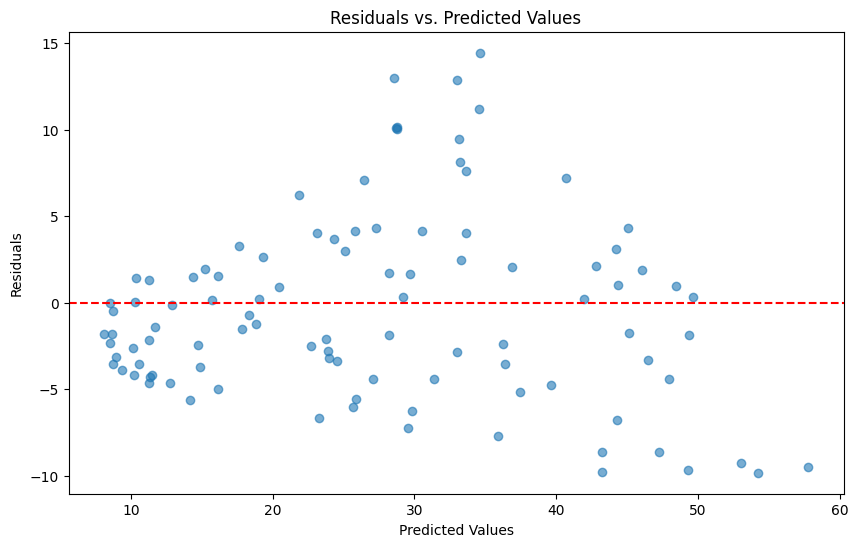

In [85]:
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

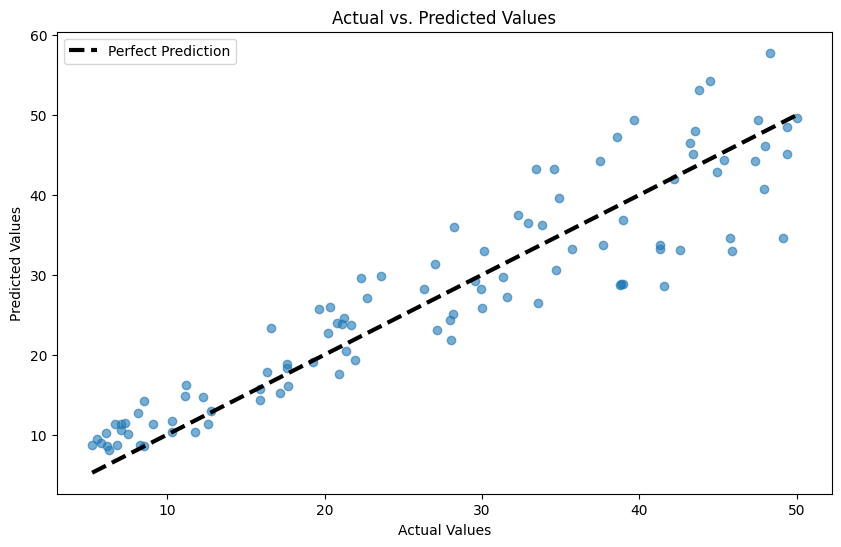

In [86]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

In [88]:
num_bins = 5

In [89]:
y_test_binned = pd.cut(y_test, bins=num_bins, labels=False)
y_pred_binned = pd.cut(y_pred, bins=num_bins, labels=False)

In [90]:
conf_matrix = confusion_matrix(y_test_binned, y_pred_binned)

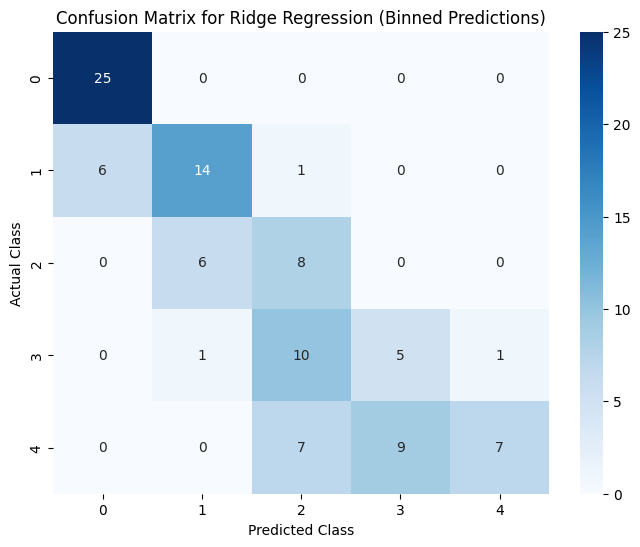

In [92]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix for Ridge Regression (Binned Predictions)')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()